In [278]:
# import libraries 
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [279]:
# get receiver data every time steps 
import pyasdf
seisrec  = pyasdf.ASDFDataSet("/import/deadlock-data/taufiqurrahman/MESS2018/experiment_Maeda2016/seismogram_receiver.h5")

# displacement
uX_obs = np.stack(waveforms.displacement.select()[0].data for k, waveforms in enumerate(seisrec.waveforms))
uY_obs = np.stack(waveforms.displacement.select()[1].data for k, waveforms in enumerate(seisrec.waveforms))
uZ_obs = np.stack(waveforms.displacement.select()[2].data for k, waveforms in enumerate(seisrec.waveforms))

# velocity
vX_obs = np.stack(waveforms.velocity.select()[0].data for k, waveforms in enumerate(seisrec.waveforms))
vY_obs = np.stack(waveforms.velocity.select()[1].data for k, waveforms in enumerate(seisrec.waveforms))
vZ_obs = np.stack(waveforms.velocity.select()[2].data for k, waveforms in enumerate(seisrec.waveforms))

# acceleration
aX_obs = np.stack(waveforms.acceleration.select()[0].data for k, waveforms in enumerate(seisrec.waveforms))
aY_obs = np.stack(waveforms.acceleration.select()[1].data for k, waveforms in enumerate(seisrec.waveforms))
aZ_obs = np.stack(waveforms.acceleration.select()[2].data for k, waveforms in enumerate(seisrec.waveforms))

# spatial gradients
uXX_obs = np.stack(waveforms.gradient.select()[0].data for k, waveforms in enumerate(seisrec.waveforms))
uXY_obs = np.stack(waveforms.gradient.select()[1].data for k, waveforms in enumerate(seisrec.waveforms))
uXZ_obs = np.stack(waveforms.gradient.select()[2].data for k, waveforms in enumerate(seisrec.waveforms))
uYX_obs = np.stack(waveforms.gradient.select()[3].data for k, waveforms in enumerate(seisrec.waveforms))
uYY_obs = np.stack(waveforms.gradient.select()[4].data for k, waveforms in enumerate(seisrec.waveforms))
uYZ_obs = np.stack(waveforms.gradient.select()[5].data for k, waveforms in enumerate(seisrec.waveforms))
uZX_obs = np.stack(waveforms.gradient.select()[6].data for k, waveforms in enumerate(seisrec.waveforms))
uZY_obs = np.stack(waveforms.gradient.select()[7].data for k, waveforms in enumerate(seisrec.waveforms))
uZZ_obs = np.stack(waveforms.gradient.select()[8].data for k, waveforms in enumerate(seisrec.waveforms))

In [280]:
# get grid data every time steps 
import pyasdf
seisgrid = pyasdf.ASDFDataSet("/import/deadlock-data/taufiqurrahman/MESS2018/experiment_Maeda2016/seismogram_grid.h5")

# displacement
uX_grid = np.stack(waveforms.displacement.select()[0].data for k, waveforms in enumerate(seisgrid.waveforms))
uY_grid = np.stack(waveforms.displacement.select()[1].data for k, waveforms in enumerate(seisgrid.waveforms))
uZ_grid = np.stack(waveforms.displacement.select()[2].data for k, waveforms in enumerate(seisgrid.waveforms))

# velocity
vX_grid = np.stack(waveforms.velocity.select()[0].data for k, waveforms in enumerate(seisgrid.waveforms))
vY_grid = np.stack(waveforms.velocity.select()[1].data for k, waveforms in enumerate(seisgrid.waveforms))
vZ_grid = np.stack(waveforms.velocity.select()[2].data for k, waveforms in enumerate(seisgrid.waveforms))

# acceleration
aX_grid = np.stack(waveforms.acceleration.select()[0].data for k, waveforms in enumerate(seisgrid.waveforms))
aY_grid = np.stack(waveforms.acceleration.select()[1].data for k, waveforms in enumerate(seisgrid.waveforms))
aZ_grid = np.stack(waveforms.acceleration.select()[2].data for k, waveforms in enumerate(seisgrid.waveforms))

# spatial gradients
uXX_grid = np.stack(waveforms.gradient.select()[0].data for k, waveforms in enumerate(seisgrid.waveforms))
uXY_grid = np.stack(waveforms.gradient.select()[1].data for k, waveforms in enumerate(seisgrid.waveforms))
uXZ_grid = np.stack(waveforms.gradient.select()[2].data for k, waveforms in enumerate(seisgrid.waveforms))
uYX_grid = np.stack(waveforms.gradient.select()[3].data for k, waveforms in enumerate(seisgrid.waveforms))
uYY_grid = np.stack(waveforms.gradient.select()[4].data for k, waveforms in enumerate(seisgrid.waveforms))
uYZ_grid = np.stack(waveforms.gradient.select()[5].data for k, waveforms in enumerate(seisgrid.waveforms))
uZX_grid = np.stack(waveforms.gradient.select()[6].data for k, waveforms in enumerate(seisgrid.waveforms))
uZY_grid = np.stack(waveforms.gradient.select()[7].data for k, waveforms in enumerate(seisgrid.waveforms))
uZZ_grid = np.stack(waveforms.gradient.select()[8].data for k, waveforms in enumerate(seisgrid.waveforms))

In [281]:
# input receiver's location from csv file 
csv_rec_in = np.loadtxt('/import/deadlock-data/taufiqurrahman/MESS2018/experiment_Maeda2016/receiver.csv', delimiter=',')
rec_x = csv_rec_in[0]
rec_y = csv_rec_in[1]

# input grid's location from csv file 
csv_grid_in = np.loadtxt('/import/deadlock-data/taufiqurrahman/MESS2018/experiment_Maeda2016/grid.csv', delimiter=',')
grid_x = csv_grid_in[0]
grid_y = csv_grid_in[1]

In [282]:
! cat /import/deadlock-data/taufiqurrahman/MESS2018/experiment_Maeda2016/source.toml


[[source]]
name = "0000"
location = [127539.0, 76823.0, -60000.0]
spatial_type = "moment_tensor"
temporal_type = "ricker"
center_frequency = 0.25
scale = [1000000000.0, 1000000000.0, 1000000000.0, 0.0, 0.0, 0.0]


In [283]:
src_x = 127539./1000
src_y = 76823./1000

<IPython.core.display.Javascript object>


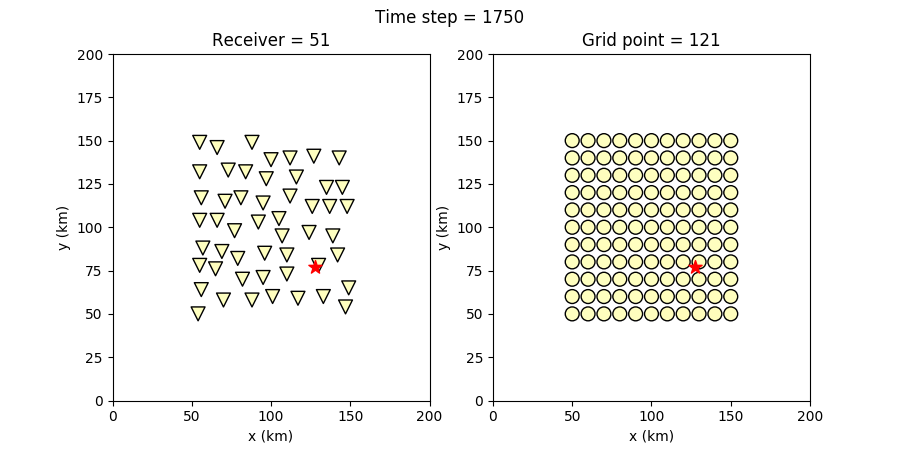

In [284]:
# plot configuration 
fig = plt.figure(figsize=(9,4.5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# plot source and receiver positions in 2d maps
# note: comma is needed to update the variable
ax1.set_xlim(0,200)
ax1.set_ylim(0,200)
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')
ax1.scatter(rec_x,rec_y, c ='w',marker='v', s=100, label='receivers', edgecolor='k')
ax1.scatter(src_x,src_y, c='r', marker='*', s=100, label='source')
ax1.set_title('Receiver = {}'.format(rec_x.size))

ax2.set_xlim(0,200)
ax2.set_ylim(0,200)
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')
ax2.scatter(grid_x,grid_y, c='w', marker='o', s=100, label='grid points', edgecolor='k')
ax2.scatter(src_x,src_y, c='r', marker='*', s=100, label='source')
ax2.set_title('Grid point = {}'.format(grid_x.size))

# show the result on screen
plt.suptitle('Time step = 0')
#plt.tight_layout()
plt.show()

In [290]:
# run animation 
data1 = uY_obs
data2 = uY_grid
lim1 = np.max([np.abs(np.min(data1)),np.abs(np.max(data1))])
lim2 = np.max([np.abs(np.min(data2)),np.abs(np.max(data2))])

for it in range(600,data1[1].size):
    # update data for wave propagation plot
    idisp = 5 # display frequency
    if (it % idisp) == 0:
        ax1.clear()
        ax2.clear()
        ax1.set_xlim(0,200);ax1.set_ylim(0,200)
        ax1.set_xlabel('x (km)');ax1.set_ylabel('y (km)')
        ax1.set_title('Receiver = {}'.format(rec_x.size))
        #ax1.set_title('Time Step = {}'.format(it))
        ax1.scatter(rec_x,rec_y, c=data1[:,it], vmin= -lim1, vmax = lim1,
                    cmap = plt.cm.get_cmap('RdYlBu'), marker='v', s=100, label='receivers', edgecolor='k')
        ax1.scatter(src_x,src_y, c='r', marker='*', s=100, label='source')
        ax2.set_xlim(0,200); ax2.set_ylim(0,200)
        ax2.set_xlabel('x (km)');ax2.set_ylabel('y (km)')
        ax2.set_title('Grid point = {}'.format(grid_x.size))
        #ax2.set_title('Time Step = {}'.format(it))
        ax2.scatter(grid_x,grid_y, c=data2[:,it], vmin= -lim2, vmax = lim2,
                    cmap = plt.cm.get_cmap('RdYlBu'), marker='o', s=100, label='receivers', edgecolor='k')
        ax2.scatter(src_x,src_y, c='r', marker='*', s=100, label='source')
        plt.suptitle('Time step = {}'.format(it))
        plt.gcf().canvas.draw()

# Next plans for Jupyter notebook
- Try to put more dense receivers
- Slowness map
- Structural phase velocity (corrected) Helmholtz equation
- Full wavefield calculation including divergence and rotation
- Surface wave (Love and Rayleigh wave) decomposition
- Apply on heterogeneous model, then possibly add anisotropic parameters (see Ridder & Curtis, 2017)
- Try to use real earthquake data (USArray or Hi-net)
- Solve structural parameters (topography and bathymetry involved in the model)
- Make use of 6-components (3 translation and 3 rotation components) receivers or ADR
- maybe write a paper about this.. :)